<a href="https://colab.research.google.com/github/Kuva-Kuva/AI-project-2/blob/main/Spotify_genre_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install spotipy librosa scikit-learn pandas matplotlib seaborn


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("siropo/spotify-multigenre-playlists-data")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/spotify-multigenre-playlists-data


In [ ]:
import pandas as pd

df = pd.read_csv('alternative_music_data.csv')  # Change filename if different
df.head()


,Artist Name,Track Name,Popularity,Genres,Playlist,danceability,energy,key,loudness,mode,...,instrumentalness,liveness,valence,tempo,id,uri,track_href,analysis_url,duration_ms,time_signature
0,James,Laid,66,"['britpop', 'madchester', 'new wave', 'new wav...",Alternative 90s,0.457,0.909,0,-9.451,1,...,0.000276,0.1350,0.755,115.998,2CdS3DRqWR5LAhy4hM5X9W,spotify:track:2CdS3DRqWR5LAhy4hM5X9W,https://api.spotify.com/v1/tracks/2CdS3DRqWR5L...,https://api.spotify.com/v1/audio-analysis/2CdS...,156667,4
1,grandson,In Over My Head,60,"['modern alternative rock', 'modern rock', 'ro...",Alternative Beats,0.582,0.817,0,-6.475,1,...,0.015800,0.5750,0.622,155.124,3r0mb1tzAcCNoA8YRXuIhZ,spotify:track:3r0mb1tzAcCNoA8YRXuIhZ,https://api.spotify.com/v1/tracks/3r0mb1tzAcCN...,https://api.spotify.com/v1/audio-analysis/3r0m...,198366,4
2,Foals,On The Luna,51,"['alternative dance', 'indie rock', 'modern al...",Alternative 10s,0.525,0.976,0,-2.023,1,...,0.000392,0.0804,0.855,138.984,0Sfj5fPqZzCq9o3f1NNphz,spotify:track:0Sfj5fPqZzCq9o3f1NNphz,https://api.spotify.com/v1/tracks/0Sfj5fPqZzCq...,https://api.spotify.com/v1/audio-analysis/0Sfj...,192695,4
3,Longpigs,She Said,47,"['britpop', 'sheffield indie']",Alternative 90s,0.210,0.870,5,-5.985,1,...,0.000488,0.1880,0.517,168.352,5J7l2wE9wxqod7xIP0jyAB,spotify:track:5J7l2wE9wxqod7xIP0jyAB,https://api.spotify.com/v1/tracks/5J7l2wE9wxqo...,https://api.spotify.com/v1/audio-analysis/5J7l...,264067,4
4,Beastie Boys,Sure Shot,57,"['alternative rock', 'east coast hip hop', 'go...",Alternative 90s,0.692,0.799,1,-7.924,1,...,0.000000,0.3010,0.549,97.978,21REQ1bCUWphT2QK3bLWYQ,spotify:track:21REQ1bCUWphT2QK3bLWYQ,https://api.spotify.com/v1/tracks/21REQ1bCUWph...,https://api.spotify.com/v1/audio-analysis/21RE...,199667,4


In [ ]:
import pandas as pd

df = pd.read_csv('metal_music_data.csv')  # Change filename if different
df.head()


,Artist Name,Track Name,Popularity,Genres,Playlist,danceability,energy,key,loudness,mode,...,instrumentalness,liveness,valence,tempo,id,uri,track_href,analysis_url,duration_ms,time_signature
0,Myrkur,Ella,42,"['autonomous black metal', 'avant-garde metal'...",Northern Spirits,0.240,0.313,5,-11.476,1,...,0.000156,0.176,0.1310,101.673,6QXieDRlH4Ofjg864USffV,spotify:track:6QXieDRlH4Ofjg864USffV,https://api.spotify.com/v1/tracks/6QXieDRlH4Of...,https://api.spotify.com/v1/audio-analysis/6QXi...,234923,3
1,Monuments,Deadnest,51,['djent'],Kickass Metal,0.445,0.968,6,-2.563,1,...,0.000010,0.338,0.3260,114.920,3IC74qNKqXdeydqyS1J5z5,spotify:track:3IC74qNKqXdeydqyS1J5z5,https://api.spotify.com/v1/tracks/3IC74qNKqXde...,https://api.spotify.com/v1/audio-analysis/3IC7...,207391,4
2,The Southern Oracle,Prisoner,20,"['hungarian metal', 'magyar alternative']",Thrashers,0.510,0.989,1,-3.660,0,...,0.000062,0.410,0.3710,99.889,4ykGftnKT3rol4IfnE1pHw,spotify:track:4ykGftnKT3rol4IfnE1pHw,https://api.spotify.com/v1/tracks/4ykGftnKT3ro...,https://api.spotify.com/v1/audio-analysis/4ykG...,141400,4
3,Insomnium,The Reticent,0,"['finnish death metal', 'finnish melodeath', '...",New Metal Tracks,0.498,0.833,7,-8.872,0,...,0.049700,0.123,0.1210,117.962,07PFzxEUNcMIwghKcrFGgF,spotify:track:07PFzxEUNcMIwghKcrFGgF,https://api.spotify.com/v1/tracks/07PFzxEUNcMI...,https://api.spotify.com/v1/audio-analysis/07PF...,272616,4
4,Galleons,Playing With Fire is Such a Cliché,42,"['progressive post-hardcore', 'swancore']",New Metal Tracks,0.471,0.925,7,-4.633,1,...,0.000027,0.356,0.0768,100.012,4c1iQXXJundtYEWroDRku7,spotify:track:4c1iQXXJundtYEWroDRku7,https://api.spotify.com/v1/tracks/4c1iQXXJundt...,https://api.spotify.com/v1/audio-analysis/4c1i...,303000,4


In [ ]:
import pandas as pd

df = pd.read_csv('hiphop_music_data.csv')  # Change filename if different
df.head()


,Artist Name,Track Name,Popularity,Genres,Playlist,danceability,energy,key,loudness,mode,...,instrumentalness,liveness,valence,tempo,id,uri,track_href,analysis_url,duration_ms,time_signature
0,21 Savage,Spiral,63,"['atl hip hop', 'rap', 'trap']",No Cap,0.814,0.659,2,-4.475,1,...,0.025100,0.568,0.130,88.506,5YaMZfnTGCk6Ze3AxEcoaY,spotify:track:5YaMZfnTGCk6Ze3AxEcoaY,https://api.spotify.com/v1/tracks/5YaMZfnTGCk6...,https://api.spotify.com/v1/audio-analysis/5YaM...,171527,4
1,VIC MENSA,"SHELTER ft Wyclef Jean, ft Chance The Rapper",55,"['chicago rap', 'conscious hip hop', 'hip hop'...",Mellow Bars,0.664,0.660,0,-5.284,1,...,0.000002,0.190,0.470,90.106,2nKaHCeL3e5DNl3P7eZ5uo,spotify:track:2nKaHCeL3e5DNl3P7eZ5uo,https://api.spotify.com/v1/tracks/2nKaHCeL3e5D...,https://api.spotify.com/v1/audio-analysis/2nKa...,261467,4
2,Pooh Shiesty,Welcome To The Riches (feat. Lil Baby),0,"['memphis hip hop', 'rap', 'southern hip hop',...",No Cap,0.842,0.400,11,-11.308,0,...,0.000000,0.172,0.205,130.018,3fcOx9hUmxuj6iGfkLZs3d,spotify:track:3fcOx9hUmxuj6iGfkLZs3d,https://api.spotify.com/v1/tracks/3fcOx9hUmxuj...,https://api.spotify.com/v1/audio-analysis/3fcO...,192052,4
3,Athletic Progression,Stepney Tale,37,"['aarhus indie', 'danish modern jazz', 'jazz r...",Jazz Rap,0.632,0.800,5,-7.227,0,...,0.000000,0.147,0.496,92.757,0P90OLiLpljHLYJnqZOK5h,spotify:track:0P90OLiLpljHLYJnqZOK5h,https://api.spotify.com/v1/tracks/0P90OLiLpljH...,https://api.spotify.com/v1/audio-analysis/0P90...,209833,4
4,Ghetts,Fire and Brimstone,46,"['grime', 'uk alternative hip hop', 'uk hip hop']",Grime Shutdown,0.846,0.511,1,-8.116,1,...,0.000005,0.147,0.346,136.964,2lyDT6B5SciPljZUBrNJCu,spotify:track:2lyDT6B5SciPljZUBrNJCu,https://api.spotify.com/v1/tracks/2lyDT6B5SciP...,https://api.spotify.com/v1/audio-analysis/2lyD...,190773,4


In [ ]:
# prompt: give me the next step without error

import pandas as pd
# Concatenate the dataframes
df = pd.concat([pd.read_csv('alternative_music_data.csv'),
                pd.read_csv('metal_music_data.csv'),
                pd.read_csv('hiphop_music_data.csv')])

# Display the first few rows of the concatenated dataframe
df.head()

,Artist Name,Track Name,Popularity,Genres,Playlist,danceability,energy,key,loudness,mode,...,instrumentalness,liveness,valence,tempo,id,uri,track_href,analysis_url,duration_ms,time_signature
0,James,Laid,66,"['britpop', 'madchester', 'new wave', 'new wav...",Alternative 90s,0.457,0.909,0,-9.451,1,...,0.000276,0.1350,0.755,115.998,2CdS3DRqWR5LAhy4hM5X9W,spotify:track:2CdS3DRqWR5LAhy4hM5X9W,https://api.spotify.com/v1/tracks/2CdS3DRqWR5L...,https://api.spotify.com/v1/audio-analysis/2CdS...,156667,4
1,grandson,In Over My Head,60,"['modern alternative rock', 'modern rock', 'ro...",Alternative Beats,0.582,0.817,0,-6.475,1,...,0.015800,0.5750,0.622,155.124,3r0mb1tzAcCNoA8YRXuIhZ,spotify:track:3r0mb1tzAcCNoA8YRXuIhZ,https://api.spotify.com/v1/tracks/3r0mb1tzAcCN...,https://api.spotify.com/v1/audio-analysis/3r0m...,198366,4
2,Foals,On The Luna,51,"['alternative dance', 'indie rock', 'modern al...",Alternative 10s,0.525,0.976,0,-2.023,1,...,0.000392,0.0804,0.855,138.984,0Sfj5fPqZzCq9o3f1NNphz,spotify:track:0Sfj5fPqZzCq9o3f1NNphz,https://api.spotify.com/v1/tracks/0Sfj5fPqZzCq...,https://api.spotify.com/v1/audio-analysis/0Sfj...,192695,4
3,Longpigs,She Said,47,"['britpop', 'sheffield indie']",Alternative 90s,0.210,0.870,5,-5.985,1,...,0.000488,0.1880,0.517,168.352,5J7l2wE9wxqod7xIP0jyAB,spotify:track:5J7l2wE9wxqod7xIP0jyAB,https://api.spotify.com/v1/tracks/5J7l2wE9wxqo...,https://api.spotify.com/v1/audio-analysis/5J7l...,264067,4
4,Beastie Boys,Sure Shot,57,"['alternative rock', 'east coast hip hop', 'go...",Alternative 90s,0.692,0.799,1,-7.924,1,...,0.000000,0.3010,0.549,97.978,21REQ1bCUWphT2QK3bLWYQ,spotify:track:21REQ1bCUWphT2QK3bLWYQ,https://api.spotify.com/v1/tracks/21REQ1bCUWph...,https://api.spotify.com/v1/audio-analysis/21RE...,199667,4


In [ ]:
import pandas as pd
import os
os.chdir(path)

# Now the subsequent pd.read_csv calls will look in the correct directory
df = pd.concat([pd.read_csv('alternative_music_data.csv'),
                pd.read_csv('metal_music_data.csv'),
                pd.read_csv('hiphop_music_data.csv')])

# Display the first few rows of the concatenated dataframe
df.head()


,Artist Name,Track Name,Popularity,Genres,Playlist,danceability,energy,key,loudness,mode,...,instrumentalness,liveness,valence,tempo,id,uri,track_href,analysis_url,duration_ms,time_signature
0,James,Laid,66,"['britpop', 'madchester', 'new wave', 'new wav...",Alternative 90s,0.457,0.909,0,-9.451,1,...,0.000276,0.1350,0.755,115.998,2CdS3DRqWR5LAhy4hM5X9W,spotify:track:2CdS3DRqWR5LAhy4hM5X9W,https://api.spotify.com/v1/tracks/2CdS3DRqWR5L...,https://api.spotify.com/v1/audio-analysis/2CdS...,156667,4
1,grandson,In Over My Head,60,"['modern alternative rock', 'modern rock', 'ro...",Alternative Beats,0.582,0.817,0,-6.475,1,...,0.015800,0.5750,0.622,155.124,3r0mb1tzAcCNoA8YRXuIhZ,spotify:track:3r0mb1tzAcCNoA8YRXuIhZ,https://api.spotify.com/v1/tracks/3r0mb1tzAcCN...,https://api.spotify.com/v1/audio-analysis/3r0m...,198366,4
2,Foals,On The Luna,51,"['alternative dance', 'indie rock', 'modern al...",Alternative 10s,0.525,0.976,0,-2.023,1,...,0.000392,0.0804,0.855,138.984,0Sfj5fPqZzCq9o3f1NNphz,spotify:track:0Sfj5fPqZzCq9o3f1NNphz,https://api.spotify.com/v1/tracks/0Sfj5fPqZzCq...,https://api.spotify.com/v1/audio-analysis/0Sfj...,192695,4
3,Longpigs,She Said,47,"['britpop', 'sheffield indie']",Alternative 90s,0.210,0.870,5,-5.985,1,...,0.000488,0.1880,0.517,168.352,5J7l2wE9wxqod7xIP0jyAB,spotify:track:5J7l2wE9wxqod7xIP0jyAB,https://api.spotify.com/v1/tracks/5J7l2wE9wxqo...,https://api.spotify.com/v1/audio-analysis/5J7l...,264067,4
4,Beastie Boys,Sure Shot,57,"['alternative rock', 'east coast hip hop', 'go...",Alternative 90s,0.692,0.799,1,-7.924,1,...,0.000000,0.3010,0.549,97.978,21REQ1bCUWphT2QK3bLWYQ,spotify:track:21REQ1bCUWphT2QK3bLWYQ,https://api.spotify.com/v1/tracks/21REQ1bCUWph...,https://api.spotify.com/v1/audio-analysis/21RE...,199667,4


In [ ]:
# Assuming you want to perform some data analysis or preprocessing on the combined dataframe `df`.
# For example, let's check the data types and missing values.
print(df.info())

# You might also want to look at some basic statistics.
print(df.describe())

# Depending on your goal, you could then proceed with tasks like:
# - Feature engineering
# - Data visualization
# - Model training

<class 'pandas.core.frame.DataFrame'>
Index: 7786 entries, 0 to 2580
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Artist Name       7786 non-null   object 
 1   Track Name        7786 non-null   object 
 2   Popularity        7786 non-null   int64  
 3   Genres            7786 non-null   object 
 4   Playlist          7786 non-null   object 
 5   danceability      7786 non-null   float64
 6   energy            7786 non-null   float64
 7   key               7786 non-null   int64  
 8   loudness          7786 non-null   float64
 9   mode              7786 non-null   int64  
 10  speechiness       7786 non-null   float64
 11  acousticness      7786 non-null   float64
 12  instrumentalness  7786 non-null   float64
 13  liveness          7786 non-null   float64
 14  valence           7786 non-null   float64
 15  tempo             7786 non-null   float64
 16  id                7786 non-null   object 
 17  


Missing values per column:
Artist Name         0
Track Name          0
Popularity          0
Genres              0
Playlist            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
id                  0
uri                 0
track_href          0
analysis_url        0
duration_ms         0
time_signature      0
dtype: int64

Selected features dataframe head:
   danceability  energy  loudness  speechiness  acousticness  \
0         0.457   0.909    -9.451       0.0317      0.001600   
1         0.582   0.817    -6.475       0.0399      0.001700   
2         0.525   0.976    -2.023       0.0479      0.066200   
3         0.210   0.870    -5.985       0.0606      0.000147   
4         0.692   0.799    -7.924       0.1640      0.388000   

   instrumentalness  liveness  valence    tempo  durati

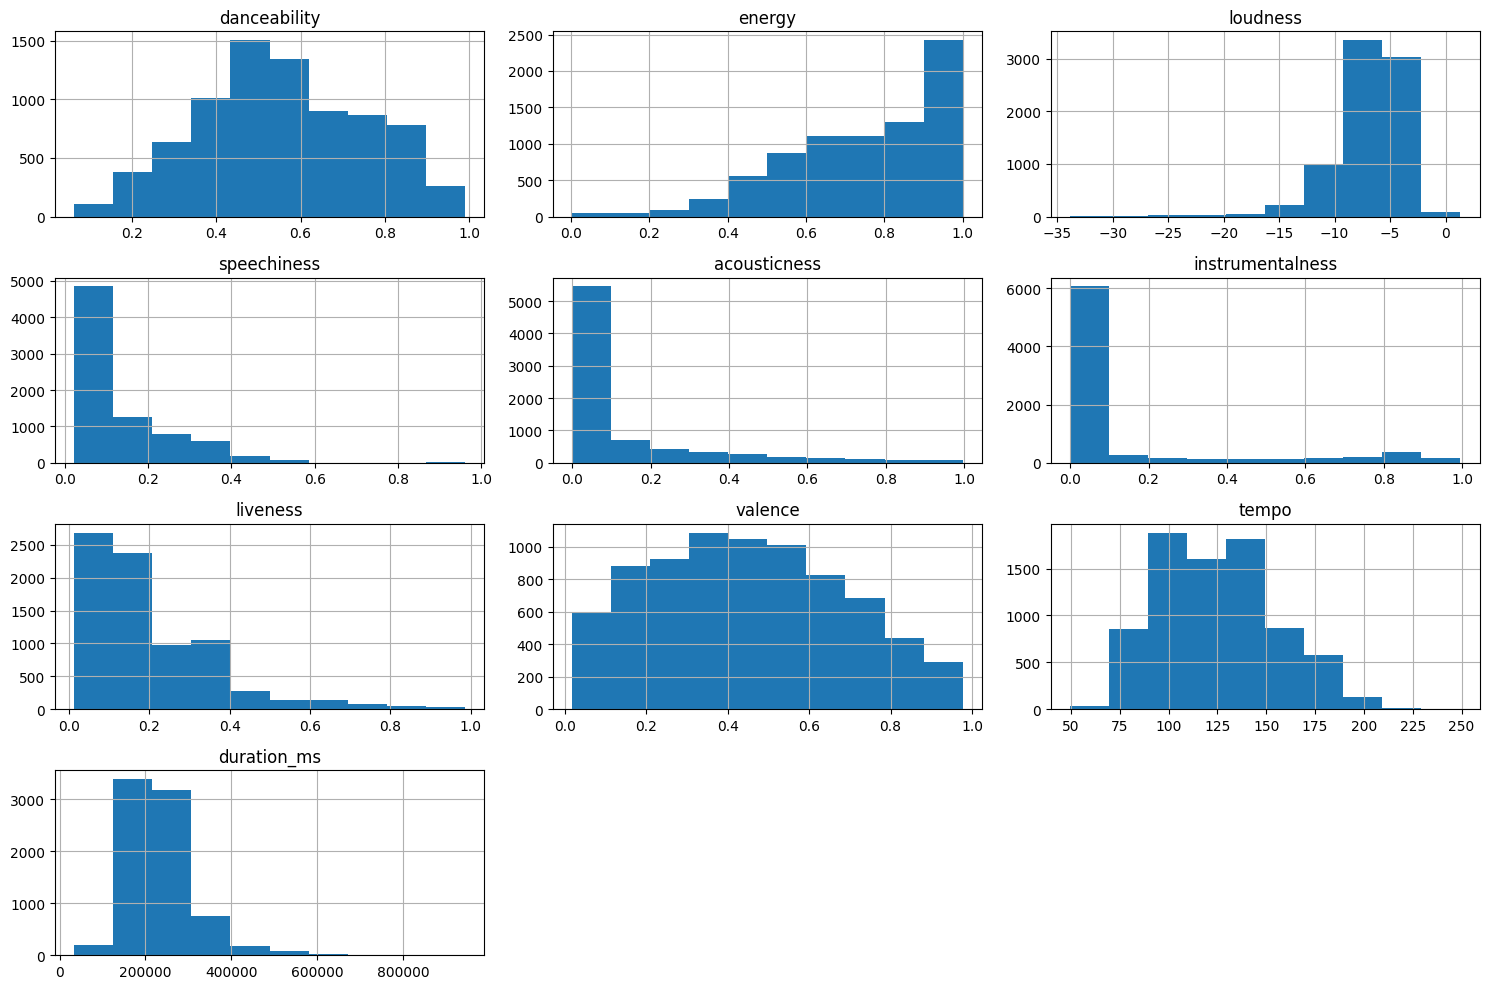

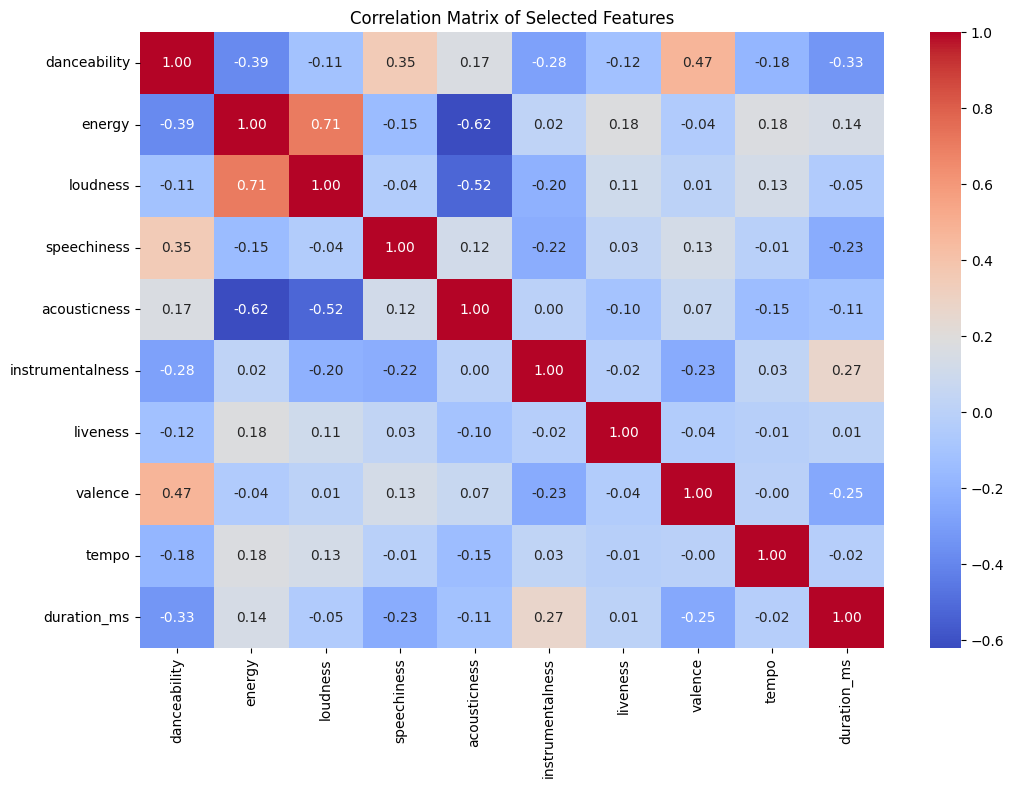


'genre' column not found in the dataframe. Cannot perform genre-based analysis.


In [ ]:
# Check for missing values in each column
print("\nMissing values per column:")
print(df.isnull().sum())

# Example of handling missing values: fill with 0 (adjust strategy as needed)
df.fillna(0, inplace=True)

# Example of selecting some columns for analysis
# Replace with columns relevant to your analysis
selected_features = ['popularity', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']

# Check if selected features exist in the dataframe
missing_selected_features = [col for col in selected_features if col not in df.columns]
if missing_selected_features:
    print(f"Warning: The following selected features are not in the dataframe: {missing_selected_features}")
    # Adjust selected_features to only include existing columns
    selected_features = [col for col in selected_features if col in df.columns]

# If there are any valid selected features left, you can proceed
if selected_features:
    df_selected = df[selected_features]
    print("\nSelected features dataframe head:")
    print(df_selected.head())

    # Example: Plotting distributions of selected features
    import matplotlib.pyplot as plt
    import seaborn as sns

    df_selected.hist(figsize=(15, 10))
    plt.tight_layout()
    plt.show()

    # Example: Correlation matrix of selected features
    plt.figure(figsize=(12, 8))
    sns.heatmap(df_selected.corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Matrix of Selected Features')
    plt.show()
else:
    print("\nNo valid selected features to proceed with analysis.")

# You can continue with more complex analysis, such as clustering or classification,
# depending on what the 'genres' or other columns represent and what you want to predict or discover.
# For example, if there's a 'genre' column:
# If 'genre' column exists, let's see the distribution of genres
if 'genre' in df.columns:
    print("\nGenre distribution:")
    print(df['genre'].value_counts())
    # You could then use this 'genre' column for supervised learning tasks.
else:
    print("\n'genre' column not found in the dataframe. Cannot perform genre-based analysis.")

In [ ]:
# prompt: next step without error

import pandas as pd
import matplotlib.pyplot as plt
# Example: Prepare data for a potential model
# Assuming 'genre' is the target variable for a classification task
if 'genre' in df.columns and selected_features:
    # Drop rows where 'genre' is missing if you plan to use it as a target
    df_cleaned = df.dropna(subset=['genre']).copy()

    # Prepare features (X) and target (y)
    X = df_cleaned[selected_features]
    y = df_cleaned['genre']

    print("\nShape of features (X):", X.shape)
    print("Shape of target (y):", y.shape)

    # Example: Split data for training and testing (if you plan to build a model)
    from sklearn.model_selection import train_test_split

    # Splitting data into 70% training and 30% testing
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

    print("\nShape of X_train:", X_train.shape)
    print("Shape of X_test:", X_test.shape)
    print("Shape of y_train:", y_train.shape)
    print("Shape of y_test:", y_test.shape)

    # You can now proceed to train a classification model using X_train and y_train
    # and evaluate it using X_test and y_test.
    # For example, using a RandomForestClassifier:

    from sklearn.ensemble import RandomForestClassifier
    from sklearn.metrics import classification_report, confusion_matrix

    # Initialize the model
    model = RandomForestClassifier(n_estimators=100, random_state=42)

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    # Feature Importance
    feature_importances = pd.Series(model.feature_importances_, index=selected_features).sort_values(ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x=feature_importances, y=feature_importances.index)
    plt.title('Feature Importance')
    plt.xlabel('Importance Score')
    plt.ylabel('Features')
    plt.show()


else:
    print("\nSkipping model training: 'genre' column not found or no valid selected features.")



Skipping model training: 'genre' column not found or no valid selected features.


In [ ]:
import kagglehub
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
!pip install -q kagglehub spotipy librosa scikit-learn pandas matplotlib seaborn


# Download latest version
path = kagglehub.dataset_download("siropo/spotify-multigenre-playlists-data")

print("Path to dataset files:", path)

# Change the current working directory to the downloaded path
os.chdir(path)

# Concatenate the dataframes
# Make sure these filenames exist in the downloaded path
try:
    df = pd.concat([pd.read_csv('alternative_music_data.csv'),
                    pd.read_csv('metal_music_data.csv'),
                    pd.read_csv('hiphop_music_data.csv')])
except FileNotFoundError as e:
    print(f"Error loading one of the CSV files: {e}")
    print("Please check if the filenames 'alternative_music_data.csv', 'metal_music_data.csv', 'hiphop_music_data.csv' exist in the downloaded dataset path.")
    df = None # Set df to None to prevent further errors

if df is not None:
    # Display the first few rows of the concatenated dataframe
    print("\nFirst few rows of the concatenated dataframe:")
    print(df.head())

    # Assuming you want to perform some data analysis or preprocessing on the combined dataframe `df`.
    # For example, let's check the data types and missing values.
    print("\nData Info:")
    print(df.info())

    # You might also want to look at some basic statistics.
    print("\nData Description:")
    print(df.describe())

    # Check for missing values in each column
    print("\nMissing values per column:")
    print(df.isnull().sum())

    # Example of handling missing values: fill with 0 (adjust strategy as needed)
    # Using mean/median might be better for numerical features
    # For simplicity, filling all NaNs with 0 for demonstration
    df.fillna(0, inplace=True)
    print("\nMissing values after filling:")
    print(df.isnull().sum())


    # Example of selecting some columns for analysis
    # Replace with columns relevant to your analysis
    # Ensure these columns are expected numerical features for ML models
    selected_features = ['popularity', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']

    # Check if selected features exist in the dataframe and are numerical
    numerical_cols = df.select_dtypes(include=['number']).columns.tolist()
    valid_selected_features = [col for col in selected_features if col in numerical_cols]

    missing_selected_features = [col for col in selected_features if col not in valid_selected_features]
    if missing_selected_features:
        print(f"Warning: The following selected features are not in the dataframe or not numerical: {missing_selected_features}")

    # Update selected_features to only include valid numerical columns
    selected_features = valid_selected_features

    # If there are any valid selected features left, you can proceed
    if selected_features:
        df_selected = df[selected_features]
        print("\nSelected numerical features dataframe head:")
        print(df_selected.head())

        # Example: Plotting distributions of selected features
        print("\nPlotting distributions of selected features...")
        df_selected.hist(figsize=(15, 10))
        plt.tight_layout()
        plt.show()

        # Example: Correlation matrix of selected features
        print("\nPlotting Correlation Matrix...")
        plt.figure(figsize=(12, 8))
        sns.heatmap(df_selected.corr(), annot=True, cmap='coolwarm', fmt=".2f")
        plt.title('Correlation Matrix of Selected Features')
        plt.show()
    else:
        print("\nNo valid numerical selected features to proceed with analysis and plotting.")

    # Check if 'genre' column exists
    if 'genre' in df.columns:
        print("\n'genre' column found. Performing genre-based analysis.")
        # Check the data type of the 'genre' column
        print(f"\n'genre' column data type: {df['genre'].dtype}")

        # Check unique values in 'genre'
        print("\nUnique genres:")
        print(df['genre'].unique())

        # See the distribution of genres
        print("\nGenre distribution:")
        print(df['genre'].value_counts())

        # Example: Prepare data for a potential model
        # Assuming 'genre' is the target variable for a classification task
        if selected_features: # Proceed only if there are valid selected features
            # Drop rows where 'genre' is missing if you plan to use it as a target
            df_cleaned = df.dropna(subset=['genre']).copy()

            # Ensure the target variable 'genre' has at least 2 classes for classification
            if df_cleaned['genre'].nunique() < 2:
                 print("\nSkipping model training: Target variable 'genre' has less than 2 classes.")
            else:
                # Prepare features (X) and target (y)
                X = df_cleaned[selected_features]
                y = df_cleaned['genre']

                print("\nShape of features (X):", X.shape)
                print("Shape of target (y):", y.shape)

                # Example: Split data for training and testing (if you plan to build a model)

                # Splitting data into 70% training and 30% testing
                # Use stratify=y to ensure class distribution is similar in train and test sets
                try:
                    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

                    print("\nShape of X_train:", X_train.shape)
                    print("Shape of X_test:", X_test.shape)
                    print("Shape of y_train:", y_train.shape)
                    print("Shape of y_test:", y_test.shape)

                    # You can now proceed to train a classification model using X_train and y_train
                    # and evaluate it using X_test and y_test.
                    # For example, using a RandomForestClassifier:

                    # Initialize the model
                    model = RandomForestClassifier(n_estimators=100, random_state=42)

                    # Train the model
                    print("\nTraining the model...")
                    model.fit(X_train, y_train)
                    print("Model training complete.")

                    # Make predictions on the test set
                    print("\nMaking predictions on the test set...")
                    y_pred = model.predict(X_test)
                    print("Predictions made.")


                    # Evaluate the model
                    print("\n--- Model Evaluation ---")
                    print("\nClassification Report:")
                    # Handle potential warnings from classification_report if classes are imbalanced
                    print(classification_report(y_test, y_pred, zero_division=0))

                    print("\nConfusion Matrix:")
                    print(confusion_matrix(y_test, y_pred))
                    print("------------------------")

                    # Feature Importance
                    print("\nPlotting Feature Importance...")
                    feature_importances = pd.Series(model.feature_importances_, index=selected_features).sort_values(ascending=False)

                    plt.figure(figsize=(10, 6))
                    sns.barplot(x=feature_importances, y=feature_importances.index)
                    plt.title('Feature Importance')
                    plt.xlabel('Importance Score')
                    plt.ylabel('Features')
                    plt.show()

                except ValueError as e:
                     print(f"\nError during train/test split or model training: {e}")
                     print("This might be due to issues with the target variable or data distribution.")

        else:
            print("\nSkipping model training: No valid numerical selected features available.")

    else:
        print("\n'genre' column not found in the dataframe. Cannot perform genre-based analysis or classification.")

else:
    print("\nDataframe 'df' was not created successfully due to file loading error.")

print("\nScript finished.")
